In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Load datasets
fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")

# Add labels
fake_df['label'] = 'fake'
true_df['label'] = 'real'

# Use only the 'text' column
data = pd.concat([fake_df[['text', 'label']], true_df[['text', 'label']]])
data = data.sample(frac=1, random_state=42).reset_index(drop=True)  # Shuffle


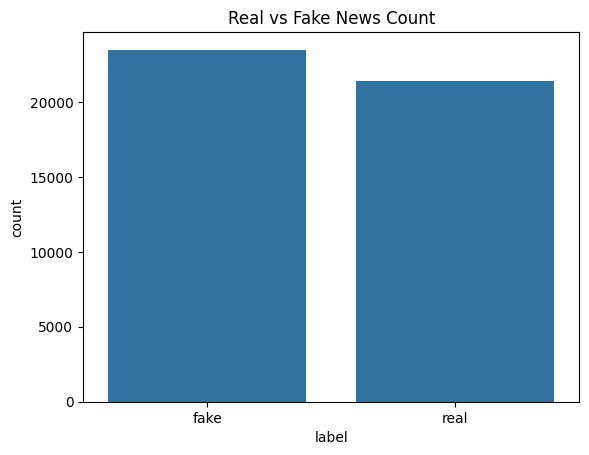

In [3]:
sns.countplot(x='label', data=data)
plt.title("Real vs Fake News Count")
plt.show()


In [4]:
X = data['text']
y = data['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [5]:
model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

✅ Accuracy: 0.984966592427617

📄 Classification Report:
               precision    recall  f1-score   support

        fake       0.99      0.98      0.99      4696
        real       0.98      0.99      0.98      4284

    accuracy                           0.98      8980
   macro avg       0.98      0.99      0.98      8980
weighted avg       0.98      0.98      0.98      8980



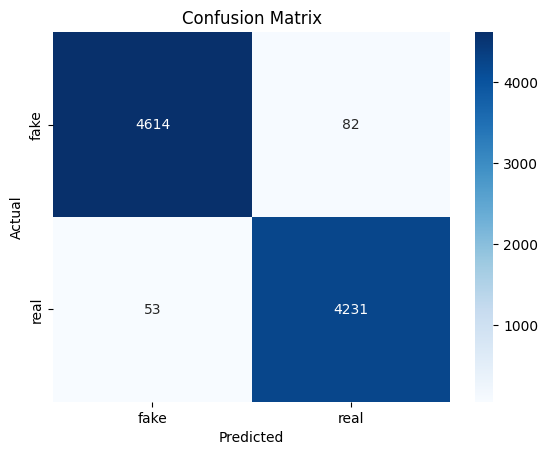

In [6]:
y_pred = model.predict(X_test_vec)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [7]:
def predict_news(news_text):
    vector = vectorizer.transform([news_text])
    prediction = model.predict(vector)[0]
    return prediction

# Example
news = "Scientists find vaccine that works on all variants"
print("Prediction:", predict_news(news))


Prediction: fake
